# Tutorial 4: Packages & Plotting

## Learn how to use packages.

One great thing about Python is the wide selection of packages it has. Packages are already written code that can help you in many tasks. To use a package, you need to import it. Let's see some examples.

The first example is `numpy`.

In [1]:
# This is the import line
import numpy as np

`numpy` allows us to work with math operations, lists, arrays, matrices and more. It is one of the most commonly used packages in Python. You can learn more about the packages on their official documentation. https://numpy.org contains all the commands you can use from the package.

`pandas` is another package in Python that allows us to work with datasets. This is an essential tool for working with data science topics in python. https://pandas.pydata.org/ contains all the commands you can use from the package.

In [2]:
import pandas as pd

Now that we have been introduced to what a package is, let's dive deeper into `Matplotlib` that allows us to plot in Python for the rest of this tutorial.

## First, what is Matplotlib?

- It is a package in Python, that allows users to insert graphics into their notebook, in order to better communicate their findings.
- Link to official documentation website: https://matplotlib.org

However, the official documentation is difficult to understand, especially for beginners. This notebook covers many areas for plotting in Jupyter Notebooks. In this section, we will cover the absolute basics you'll need.

In [3]:
# This is the import line for using the package Matplotlib
import matplotlib.pyplot as plt

#The rest of the import lines

from datetime import datetime

A basic line plot:

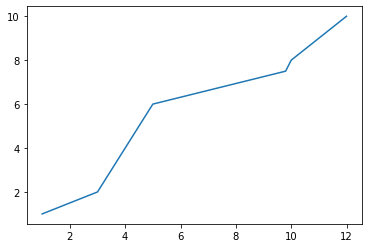

In [4]:
# This example has very few data points, so you can directly see what is happening
X = [1, 3, 5, 9.8, 10, 12] #the list of x values
Y = [1, 2, 6, 7.5, 8, 10] #the list of y values

plt.plot(X, Y) #this is what you use for most plots in Matplotlib, there are many fields you can specify further
plt.show() #function to show the plot, not having this line allows you to add to the same plot region within a cell

Scatter plot (note that we can also specify the color):

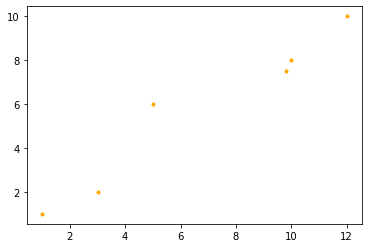

In [5]:
plt.plot(X, Y, '.', color='orange')
plt.show()

Line plot with dots for points:

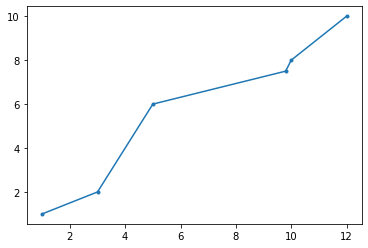

In [6]:
plt.plot(X, Y, '.-')
plt.show()

In [7]:
# You can continue to experiment in this cell, by changing what is in the quotations.
#https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html

#plt.plot(X, Y, '')
#plt.show()

Also, it is easy to add titles and labels to your plot:

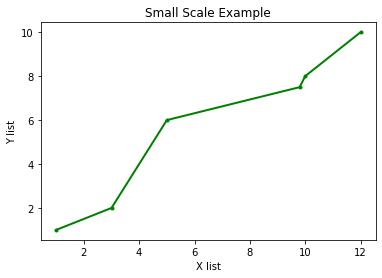

In [8]:
plt.plot(X, Y, '.-', color='green', linewidth=2)

plt.title('Small Scale Example') #Whatever you put in the string is the title
plt.xlabel('X list') #Whatever you put in the stirng is the x label
plt.ylabel('Y list') #Whatever you put in the stirng is the y label

#again, this line always goes at the end! Try moving it earlier to see what happens.
plt.show()

## Let's work with real-life data set, NYC Taxi Data Plotting.

Now that we have gone over what we can do stylistically with a plot, let's look deeper into how we can use Matplotlib for creating data visuals. This section at the same time introduces you to working with datasets.

`2017-nyc-for-hire-vehicles.csv` is imported into a dataframe. (This data came from the NYC Taxi dataset, via https://bigquery.cloud.google.com/dataset/bigquery-public-data:new_york)

This dataset contains the number of trips conducted by "for-hire vehicles" (this includes Uber trips, but not yellow or green cabs) in 2017 in New York City. The data is disaggregated by the hour and date of the pickup.

We printed out a few of the records. NOTE: the `date` column is a datetime object.

In [9]:
df = pd.read_csv('2017-nyc-for-hire-vehicles.csv')

for index, row in df.iterrows():
    df.loc[index,'t'] = datetime.strptime(row['date'],'%Y-%m-%d %H:%M:%S')

df.head()

,date,trips,t
0,2017-01-01 00:00:00,33003,2017-01-01 00:00:00
1,2017-01-01 01:00:00,42481,2017-01-01 01:00:00
2,2017-01-01 02:00:00,40476,2017-01-01 02:00:00
3,2017-01-01 03:00:00,34961,2017-01-01 03:00:00
4,2017-01-01 04:00:00,25262,2017-01-01 04:00:00


Plot trips versus date for the week of dates >= 2017-02-01 and < 2017-02-08.
Then, on the same figure, plot trips versus date - 7 days for the trips that happened in the following week (>= 2017-02-08, < 2017-02-15).

It would be helpful to look at documentation for `Matplotlib` and `Datetime` pacakges.

A couple of new things in this cell:
- plt.figure(figsize=( , )) specifies the size of the plot. Because we have a trend over time, we need our figure to be wider than the usual box.
- We added a new specification for label in plt.plot command.
- Combined with plt.legend() in the second to last line, we are able to specify which color corresponds to which curve.

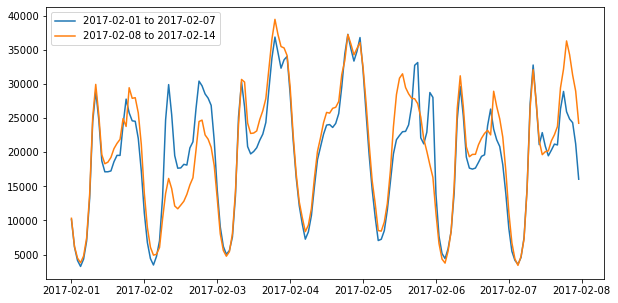

In [10]:
plt.figure(figsize=(10,5))
firstweek = df[(df['t']>='2017-02-01') & (df['t']<'2017-02-08')]
secweek = df[(df['t']>='2017-02-08') & (df['t']<'2017-02-15')]
plt.plot(firstweek['t'], firstweek['trips'], label="2017-02-01 to 2017-02-07")
plt.plot(firstweek['t'], secweek['trips'], label="2017-02-08 to 2017-02-14")
plt.legend()
plt.show()

Now we can see the comparison of number of trips between two different weeks. The trends are very similar.

Please use the next cell to add a third week on top of the previous two weeks:

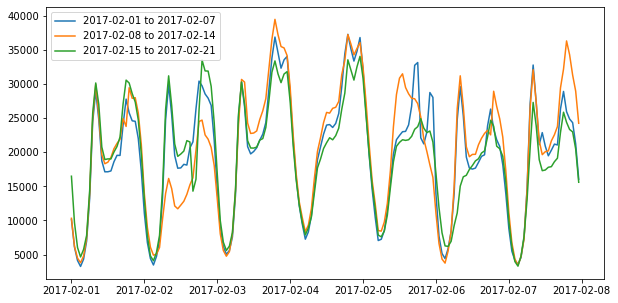

In [11]:
# Insert code here, you should reference the prvious code cell
#Copy pasting the previous cell, and editing based on that would be helpful

plt.figure(figsize=(10,5))
firstweek = df[(df['t']>='2017-02-01') & (df['t']<'2017-02-08')]
secweek = df[(df['t']>='2017-02-08') & (df['t']<'2017-02-15')]
thirdweek = df[(df['t']>='2017-02-15') & (df['t']<'2017-02-22')]
plt.plot(firstweek['t'], firstweek['trips'], label="2017-02-01 to 2017-02-07")
plt.plot(firstweek['t'], secweek['trips'], label="2017-02-08 to 2017-02-14")
plt.plot(firstweek['t'], thirdweek['trips'], label="2017-02-15 to 2017-02-21")
plt.legend()
plt.show()

## Line plot is not the only type of plot, Histograms are also very common.

Another important plotting device to learn is a histogram. You can do this in matplotlib by one command as well.

First, we generate some data for us to plot. A normal distribution is a good choice, because we know what to expect for the shape.

In [12]:
# np.random.normal generates normal random variables. loc is mean of the normal, scale is standard deviation
#of the normal, and size is how many values we generate based on the normal distribution specified.
normal_list = np.random.normal(loc=100, scale=10, size=200)

The command you should use is `plt.hist()`. Inside the parenthesis, you should fill in the list you are plotting.

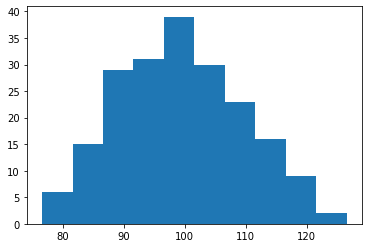

In [13]:
#Uncomment and fill in the list to plot:

plt.hist(normal_list)
plt.show()

## Plotting functions is not easy in Python.

It is actually not that simple to plot a function such as $y = x^2$ in python. You don't have a simple command to just generate the graph for you. You can even try to use a command such as plt.plot($x^2$) to see that it doesn't work.

What you need to do is generate many x and values, calculate the corresponding f(x) values, and connect them so that they look like a smooth curve.

In [14]:
# To generate the x values, we use command np.arrage. The first number is the start value, the second number is
#the end value, and the third number is how large the step is. Let's see what this line outputs.
step_size_1 = np.arange(-2, 2, 1)
step_size_half = np.arange(-2, 2, 0.5)
print('step size 1:', step_size_1)
print('step size 0.5:', step_size_half)

step size 1: [-2 -1  0  1]
step size 0.5: [-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5]


Task: please change the step size to explore how smooth the curve is. (Some numbers to try: 1, 0.5, 0.1, 0.01)

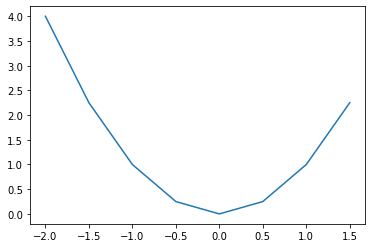

In [15]:
# This is exactly the command we explored in the previous cell, you can adjust the step size
step_size = 0.5
x = np.arange(-2, 2, step_size)
# To get the list of y's, you just square x, since we want the f(x) = x^2. You can also generate this in a loop
y = x**2

# Plotting x against y
plt.plot(x, y)
plt.show()

## Axes and Subplots allows you to plot multiple things in the same cell.

How do you have multiple plots showing on separate plotting areas? The official documentation for this is very hard to navigate, so we are going to walk you through this process.

`Important: the collection of four subplots below is called a figure. And each figure should be coded in the same code cell.`

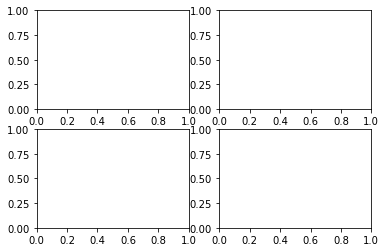

In [16]:
# The output for the line of code below shows the command that generates subplots. You can specify how many you 
#want in each column and row, and assign them accordingly to ax1, ax2, ax3, ax4.
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2)

Task: experiment with what you can plot in ax1 to ax4.

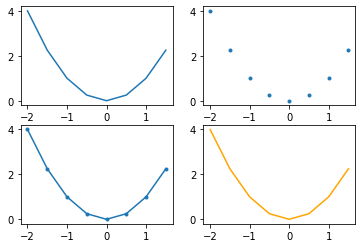

In [17]:
# Note: you can further specify the plots by things such as sharex=True, sharey=True. This allows all subplots to
#have the same x and y axes.
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2)

# Now, we put something into each of the subplots:
ax1.plot(x,y) #ax1 has what we plotted in the plotting functions section
ax2.plot(x,y,'.') #ax2 has what we plotted in the plotting functions section, but only the dots
ax3.plot(x,y,'.-') #ax3 has what we plotted in the plotting functions section, but only the dots and lines

### TODO: uncomment and put what you want to plot into ax4
ax4.plot(x,y,color='orange')

plt.show()

## Don't forget to save your plot!

We hope you have learned a lot about plotting in python. Now you just need to save the plots so you can use them in not just Jupyter Notebooks.

Of course, you can take screenshots. But saving them directly after each run is much simpler.

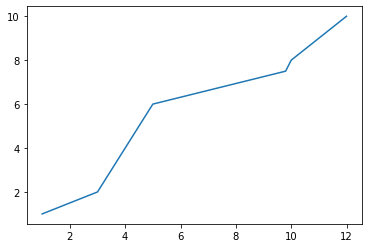

In [18]:
# Back to plotting the original example:
X = [1, 3, 5, 9.8, 10, 12]
Y = [1, 2, 6, 7.5, 8, 10]
plt.plot(X, Y)

# Now, we save it using the following command.
#plt.savefig('tutorial4.png')